# Exercise 4. 
The search and matching model of labor markets is a key model in the macro- labor literature. In one version of this model, potential workers receive wage offers from a distribution of wages each period. Potential workers must decide whether to accept and begin work at this wage (and work at this wage forever) or decline the offer and continue to “search” (i.e., receive wage offers from some exogenous distribution).
The potential workers seek to maximize the expected, discounted sum of earnings:

# $$E_0 \sum_{t=0}^\infty \beta^ty_t$$
Income, yt, is equal to wt if employed. If unemployed, agents receive unemployment benefits b.
Assume that wage offers are distributed as $ln(wt) ∼ N(μ, σ)$.

# Part 1
# $$ V^e(w) = \sum_{t=0}^\infty{\beta^tw} $$
# $$ V^u(w_t) = max\{V^e(w_t), \quad b + \beta E[V^u]\} $$


In [58]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov.approximation import rouwenhorst


# to print plots inline
%matplotlib inline

In [59]:
# Parameters
beta = 0.96
b = 0.5 

sigZ = 0.15
muZ = 0

In [72]:
# Discretize risk
nz = 100
zdist = rouwenhorst(nz, muZ, sigZ, rho=0)
wgrid = np.exp(zdist.state_values)
pi = zdist.P

In [73]:
# Guess value function
Vguess = np.zeros(nz)



In [74]:
# Set up the VFI
def mcCall(b):
    
    # Options
    VFtol = 1e-8 
    VFdist = 7.0 
    VFmaxiter = 3000 
    VFdist = 7.0 
    # Initialize arrays
    V = Vguess 
    TV = np.zeros(nz)
    PF = np.zeros_like(TV)

    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:
        for i, w in enumerate(wgrid): # loop over epsilon
            EV = 0
            for j in range(nz):  # loop over epsilon'
                EV += pi[i, j] * V[j]   

            V_e = w / (1 - beta)
            V_u = b + beta * EV 

            TV[i] = max(V_e, V_u)
            PF[i] = V_e >= V_u  # = 1 if eat cake

        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        # print('Iteration number: ',VFiter, "Distance: ", VFdist)
        VFiter += 1 

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')     
    


    VF = V # solution to the functional equation
    return VF,PF

In [75]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''

bgrid = [0,0.5,0.6,0.7,0.8,0.9,1.0]
threshold_wage = [0,0,0,0,0,0,0]
Vfunc = [0,0,0,0,0,0,0]
for i,b in enumerate(bgrid):
    VF,PF = mcCall(b)
    takejob = np.nonzero(PF)[0]
    idx = takejob[0]
    threshold_wage[i] = wgrid[idx]
    print(threshold_wage[i])
    Vfunc[i] = VF
# threshold_wage = 1.0782914914254993
first_thresh = threshold_wage[0]


Value function converged after this many iterations: 3
1.046265023070485
Value function converged after this many iterations: 3
1.0782914914254993
Value function converged after this many iterations: 3
1.0782914914254993
Value function converged after this many iterations: 3
1.0782914914254993
Value function converged after this many iterations: 3
1.1112982990374685
Value function converged after this many iterations: 3
1.1112982990374685
Value function converged after this many iterations: 3
1.1112982990374685


<Figure size 432x288 with 0 Axes>

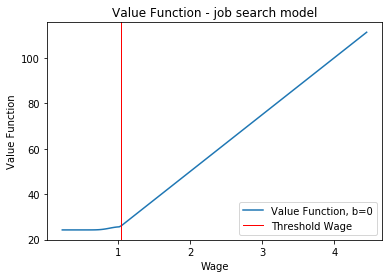

In [77]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(wgrid, Vfunc[0], label='Value Function, b=0')
ax.axvline(x=threshold_wage[0],linewidth=1, color='r',label='Threshold Wage')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)

plt.xlabel('Wage')
plt.ylabel('Value Function')
plt.title('Value Function - job search model')
plt.show()

<Figure size 432x288 with 0 Axes>

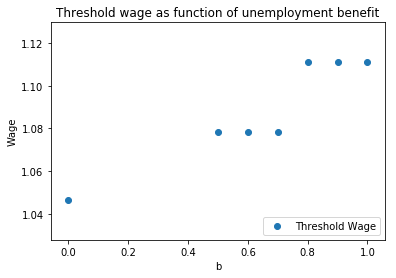

In [80]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.scatter(bgrid, threshold_wage, label='Threshold Wage')

# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)

plt.xlabel('b')
plt.ylabel('Wage')
plt.title('Threshold wage as function of unemployment benefit')
plt.show()

1.1047969799682191